# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [38]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

2023-06-07 19:35:23.823228: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [40]:
# la red neuronal convulucional es una red enuronal con unas capas y neuronas predeterminadas y se usa sobre todo para tratar imagenes

In [41]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [42]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [43]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

/var/folders/r1/hd_91nzn1yb8kh1vq1c7gt2w0000gn/T/ipykernel_4077/3096108358.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


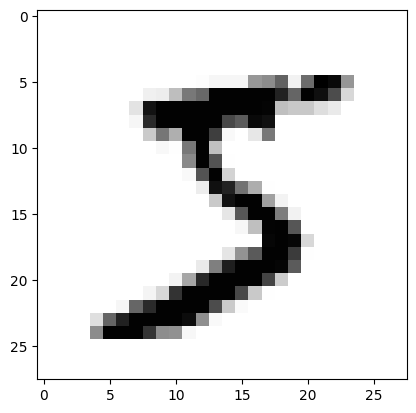

In [44]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [45]:
0/255

0.0

In [46]:
128/255

0.5019607843137255

In [47]:
255/255

1.0

In [48]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [49]:
np.mean(X_train)

0.13066062

In [50]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [51]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [52]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [53]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [54]:
model = keras.models.Sequential() #todas las redes neuronales son secuencial, todas comienza con este tipo

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28))) #capa de entrada, añadimos una layer de estilo flatten. el 28x28 son los input porque son los pixeles

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu')) #capa oculta

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax')) #capa de salida, pones tantas neuronas como grupos a clasificar

In [55]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [56]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [57]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [58]:
weights

array([[-0.00263695, -0.04666627,  0.07183836, ..., -0.00341597,
        -0.0105683 ,  0.03797045],
       [-0.05174806,  0.06435077, -0.01683674, ...,  0.04660314,
        -0.01421911,  0.05380225],
       [-0.0010645 , -0.05638417,  0.00470252, ..., -0.03035436,
         0.05526266, -0.01098748],
       ...,
       [ 0.0417054 , -0.02520613, -0.05357894, ...,  0.03111812,
         0.0017412 , -0.01989841],
       [-0.02295094, -0.0617586 , -0.0186105 , ..., -0.0615017 ,
        -0.07122992,  0.02824512],
       [ 0.06151454, -0.07436188, -0.0239237 , ...,  0.05233708,
        -0.04393759,  0.06685658]], dtype=float32)

In [59]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [60]:
len(weights[0])

300

In [61]:
28*28

784

In [62]:
300*784

235200

In [63]:
weights.size

235200

In [64]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [65]:
model.compile(
    optimizer = keras.optimizers.SGD(), #el optimizador
    loss = keras.losses.SparseCategoricalCrossentropy(), #función de pérdida, esta justo se usa para multiclases
    metrics = [keras.metrics.SparseCategoricalAccuracy()] #métricas
)

In [66]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [67]:
# Summary
model.summary() #nos devuelve las capas de la red neuronal con su info. Los parámetros es el número de neurona por la cantidad de pesos, la segunda capa oculta es porque son 300*100+100 (porque cada una pueden ser ella solas)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [68]:
X_train.shape

(50000, 28, 28)

In [69]:
50000/128

390.625

In [70]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
) #Lo guardamos en la variabe para poder graficarlo

#Accyracy da la predicción 
#Val accyraccy da la predicción de un nuevo dato que nunca ha visto, asi que con estos datos da que tal va y si hay overfitting o no
#comparando el accuracy con el val_accuracy te dice si bien, overfitting o underfitting

Epoch 1/50
391/391 [==============================] - 3s 5ms/step - loss: 1.2969 - accuracy: 0.6871 - val_loss: 0.6223 - val_accuracy: 0.8577
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5314 - accuracy: 0.8647 - val_loss: 0.4045 - val_accuracy: 0.8950
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.4071 - accuracy: 0.8886 - val_loss: 0.3421 - val_accuracy: 0.9071
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3561 - accuracy: 0.8998 - val_loss: 0.3089 - val_accuracy: 0.9138
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3255 - accuracy: 0.9074 - val_loss: 0.2879 - val_accuracy: 0.9179
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3033 - accuracy: 0.9131 - val_loss: 0.2713 - val_accuracy: 0.9221
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.2855 - accuracy: 0.9185 - val_loss: 0.2587 - val_accuracy: 0.9255
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [72]:
model.fit(
    X_train,
    y_train,
    batch_size = 64, #es bueno usar los batch como los bits, 2,4,8,16,62... etc
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0592 - accuracy: 0.9847 - val_loss: 0.0904 - val_accuracy: 0.9745
Epoch 2/10
782/782 [==============================] - 4s 4ms/step - loss: 0.0575 - accuracy: 0.9848 - val_loss: 0.0895 - val_accuracy: 0.9748
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0557 - accuracy: 0.9852 - val_loss: 0.0893 - val_accuracy: 0.9749
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0538 - accuracy: 0.9863 - val_loss: 0.0900 - val_accuracy: 0.9744
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0522 - accuracy: 0.9866 - val_loss: 0.0876 - val_accuracy: 0.9754
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0506 - accuracy: 0.9868 - val_loss: 0.0864 - val_accuracy: 0.9757
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0489 - accuracy: 0.9877 - val_loss: 0.0883 - val_accuracy: 0.9750
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [73]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


{'loss': [1.2968944311141968,
  0.5314479470252991,
  0.407123327255249,
  0.35610684752464294,
  0.3254680931568146,
  0.30329546332359314,
  0.28554412722587585,
  0.27092334628105164,
  0.25808629393577576,
  0.24658800661563873,
  0.23618751764297485,
  0.22681133449077606,
  0.2183787077665329,
  0.2099563628435135,
  0.2028503119945526,
  0.19611695408821106,
  0.18957702815532684,
  0.18348997831344604,
  0.17773759365081787,
  0.17250457406044006,
  0.1675267517566681,
  0.1626276820898056,
  0.15794526040554047,
  0.15366262197494507,
  0.1495838165283203,
  0.14554588496685028,
  0.14176851511001587,
  0.1381361335515976,
  0.1346384882926941,
  0.13145491480827332,
  0.12816697359085083,
  0.12510313093662262,
  0.12207332998514175,
  0.11951063573360443,
  0.11667876690626144,
  0.113896943628788,
  0.11136926710605621,
  0.10882251709699631,
  0.10662498325109482,
  0.10436338186264038,
  0.10216706246137619,
  0.09995435178279877,
  0.09773620963096619,
  0.09590100497007

In [74]:
history.history

{'loss': [1.2968944311141968,
  0.5314479470252991,
  0.407123327255249,
  0.35610684752464294,
  0.3254680931568146,
  0.30329546332359314,
  0.28554412722587585,
  0.27092334628105164,
  0.25808629393577576,
  0.24658800661563873,
  0.23618751764297485,
  0.22681133449077606,
  0.2183787077665329,
  0.2099563628435135,
  0.2028503119945526,
  0.19611695408821106,
  0.18957702815532684,
  0.18348997831344604,
  0.17773759365081787,
  0.17250457406044006,
  0.1675267517566681,
  0.1626276820898056,
  0.15794526040554047,
  0.15366262197494507,
  0.1495838165283203,
  0.14554588496685028,
  0.14176851511001587,
  0.1381361335515976,
  0.1346384882926941,
  0.13145491480827332,
  0.12816697359085083,
  0.12510313093662262,
  0.12207332998514175,
  0.11951063573360443,
  0.11667876690626144,
  0.113896943628788,
  0.11136926710605621,
  0.10882251709699631,
  0.10662498325109482,
  0.10436338186264038,
  0.10216706246137619,
  0.09995435178279877,
  0.09773620963096619,
  0.09590100497007

In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [76]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.296894,0.68712,0.622329,0.8577
1,0.531448,0.86466,0.404510,0.8950
2,0.407123,0.88862,0.342073,0.9071
3,0.356107,0.89976,0.308893,0.9138
4,0.325468,0.90738,0.287899,0.9179
5,0.303295,0.91312,0.271276,0.9221
6,0.285544,0.91846,0.258674,0.9255
7,0.270923,0.92200,0.247235,0.9286
8,0.258086,0.92612,0.237501,0.9313
9,0.246588,0.92972,0.228514,0.9347


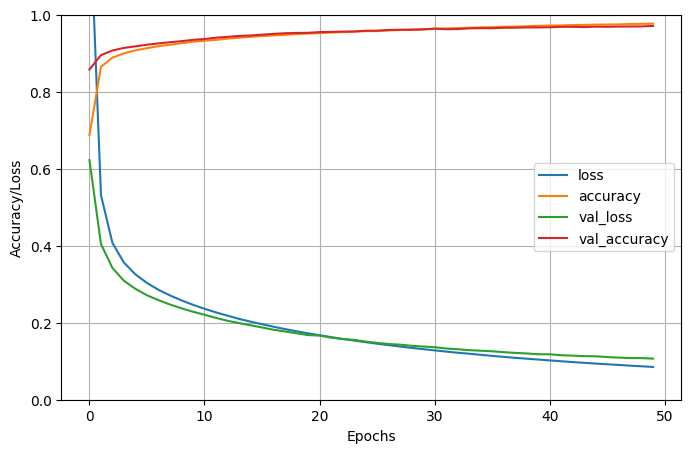

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [51]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9735


[0.08582097291946411, 0.9735000133514404]

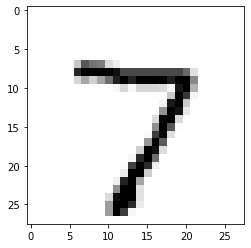

In [52]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [53]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [57]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

(1, 10)


array([[0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ]], dtype=float32)

In [58]:
predictions.argmax()

7

In [59]:
model.predict(X_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

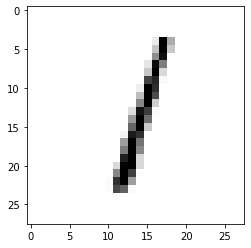

In [62]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [3]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Divimos en train, test y validation

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [ ]:
# En regresión siempre sale una neurona porque realmente devuelve un solo número

In [7]:
11610/32

362.8125

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1) # Si no se pone es relu, viene por defecto
]) # No usamos un Flaten porque no es una matriz, el flaten solo se usa cuando hay matrices que suelen ser imagenes

model.compile(loss = "mean_squared_error",
             optimizer = "sgd") #al compilar se le mete la función de pérdida y el optimizador

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7918 - val_loss: 2.5791
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4691 - val_loss: 3.0055
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4885 - val_loss: 9.0525
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4926 - val_loss: 2.9159
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4380 - val_loss: 2.9276
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4203 - val_loss: 0.3947
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4023 - val_loss: 0.3618
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3888 - val_loss: 0.3602
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3844 - val_loss: 0.3700
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3780 - val_loss: 0.3627

In [10]:
8*30 + 30

270

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                270       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [12]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3527
0.35268041491508484


In [14]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 106ms/step


array([[0.5719953],
       [1.4945469],
       [4.083253 ],
       [2.5133455],
       [2.9286652]], dtype=float32)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test[:5], y_pred))
print(r2_score(y_test[:5], y_pred))

0.4106307054913964
0.8551872146103914


### Guardar modelo  
  
Con pickle

In [19]:
import pickle

# with open("model.pk1", "rb") as m:
#     pickle.dump(m)

In [23]:
pickle.dump(model, open("models/mocel.pk1", "wb"))

In [27]:
model = pickle.load(open("models/model.pk1", "rb"))

Para guardar el modelo, en el formato de Keras (HDF5). 

In [24]:
model.save("models/my_keras_model.h5")

In [25]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [77]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5") # Aqui se dice en que archivo quieres que se guarde. Tiene un argumento que es save_freq que determina cada cuantos epochs quiere que se guarde, también hay un argumento que es save_best_only
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb]) # aqui en callbacks se determina el modelcheckpoint que has puesto antes para que se guarde el modelo

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3521
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3497
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3485
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3465
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3451
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3440
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3422A: 0s - los
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3408
Epoch 9/30
219/363 [=================>............] - ETA: 0s - loss: 0.3336

KeyboardInterrupt: 

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [29]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # la paciencia determina el número de epoch que espera que no mejore para parar, tambien tiene el min_delta, mirar en documentación
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3553 - val_loss: 0.4011
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 0.3707
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3520 - val_loss: 0.4386
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4914 - val_loss: 0.3951
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3594 - val_loss: 0.4792
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3541 - val_loss: 0.3655
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3501 - val_loss: 0.5304
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3493 - val_loss: 0.7576
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3504 - val_loss: 1.1242
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3520 - val_loss: 0.3286